Summer_Analytics_2025_Week1_Assignment

In [ ]:
# 1) Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 2) Read CSV file
cars = pd.read_csv("C:\\Users\\91739\\Downloads\\Cars.csv")

In [3]:
# 3) Display shape of dataframe
print("Shape of dataframe:", cars.shape)


Shape of dataframe: (398, 9)


In [4]:
# 4) Print all columns
print("Columns:", cars.columns.tolist())


Columns: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'name']


In [5]:
# 6) Set 'name' as index
cars.set_index('name', inplace=True)

In [6]:
# 7) Unique MPG values
print("Unique MPG values:", sorted(cars['mpg'].unique()))

Unique MPG values: [np.float64(9.0), np.float64(10.0), np.float64(11.0), np.float64(12.0), np.float64(13.0), np.float64(14.0), np.float64(14.5), np.float64(15.0), np.float64(15.5), np.float64(16.0), np.float64(16.2), np.float64(16.5), np.float64(16.9), np.float64(17.0), np.float64(17.5), np.float64(17.6), np.float64(17.7), np.float64(18.0), np.float64(18.1), np.float64(18.2), np.float64(18.5), np.float64(18.6), np.float64(19.0), np.float64(19.1), np.float64(19.2), np.float64(19.4), np.float64(19.8), np.float64(19.9), np.float64(20.0), np.float64(20.2), np.float64(20.3), np.float64(20.5), np.float64(20.6), np.float64(20.8), np.float64(21.0), np.float64(21.1), np.float64(21.5), np.float64(21.6), np.float64(22.0), np.float64(22.3), np.float64(22.4), np.float64(22.5), np.float64(23.0), np.float64(23.2), np.float64(23.5), np.float64(23.6), np.float64(23.7), np.float64(23.8), np.float64(23.9), np.float64(24.0), np.float64(24.2), np.float64(24.3), np.float64(24.5), np.float64(25.0), np.float6

In [7]:
# 8) Create horsepower/weight column and set as index
cars['hp_to_weight'] = cars['horsepower'] / cars['weight']
cars.set_index('hp_to_weight', inplace=True)

GRADED QUESTIONS (Quiz Answers)

In [8]:
# Q1: Car with highest horsepower
highest_hp_car = cars['horsepower'].idxmax()
print("Car with highest horsepower:", highest_hp_car)

Car with highest horsepower: 0.053763440860215055


In [9]:
# Q2: Cars with mpg ≥ 35
high_mpg_count = len(cars[cars['mpg'] >= 35])
print("Cars with mpg ≥ 35:", high_mpg_count)

Cars with mpg ≥ 35: 36


In [10]:
# Q3: Most common origin for hp>100 & weight<3000
common_origin = cars[(cars['horsepower'] > 100) & (cars['weight'] < 3000)]['origin'].mode()[0]
print("Most common origin:", common_origin)


Most common origin: usa


In [11]:
# Q4: Mean acceleration of Japanese cars (rounded)
japan_accel = round(cars[cars['origin'] == 'japan']['acceleration'].mean(), 2)
print("Mean acceleration (Japan):", japan_accel)


Mean acceleration (Japan): 16.17


In [13]:
#Q5: Year with highest average mpg
best_mpg_year = cars.groupby('model_year')['mpg'].mean().idxmax()
print("Year with highest avg mpg:", best_mpg_year)

Year with highest avg mpg: 80


 UNGRADED QUESTIONS


In [14]:
# Best hp/weight ratio among above-median mpg cars
median_mpg = cars['mpg'].median()
best_ratio_cars = cars[cars['mpg'] > median_mpg].index.max()
print("\nBest hp/weight ratio cars:", best_ratio_cars)


Best hp/weight ratio cars: 0.050581915846016116


C:\Users\91739\AppData\Local\Temp\ipykernel_512\1552011726.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=cars, x='model_year', y='mpg', hue='origin', ci=None)


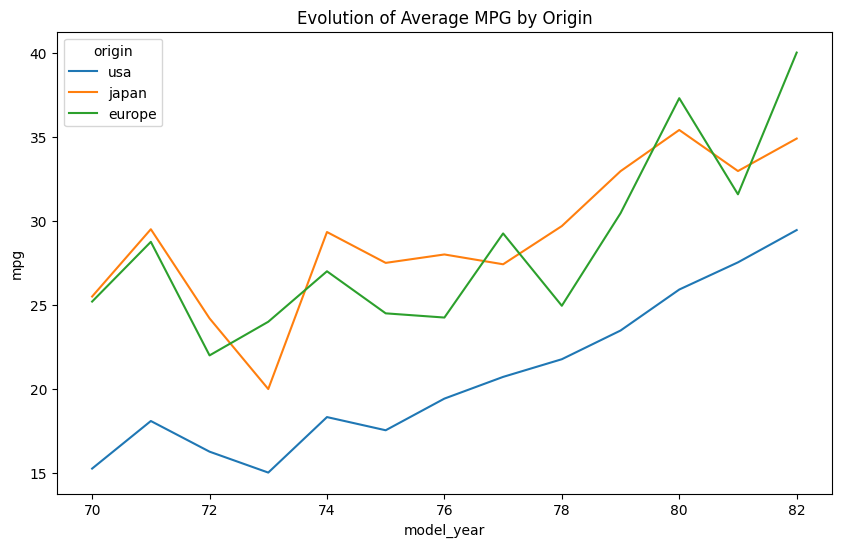

In [15]:
# Multi-line plot: Avg MPG over years by origin
plt.figure(figsize=(10,6))
sns.lineplot(data=cars, x='model_year', y='mpg', hue='origin', ci=None)
plt.title("Evolution of Average MPG by Origin")
plt.show()

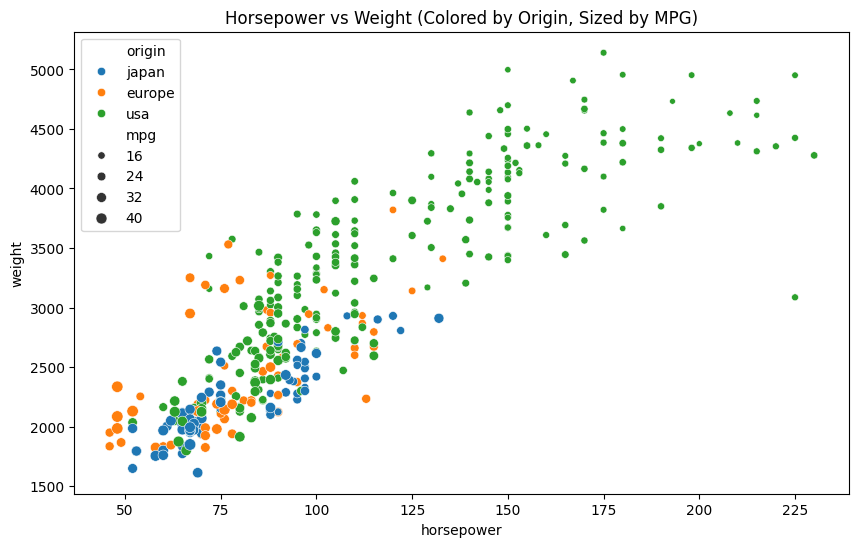

In [16]:
# Scatterplot: Horsepower vs Weight
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=cars.reset_index(),
    x='horsepower',
    y='weight',
    hue='origin',
    size='mpg',
    hue_order=['japan', 'europe', 'usa']
)
plt.title("Horsepower vs Weight (Colored by Origin, Sized by MPG)")
plt.show()

In [ ]:
# Consistent Car Models Analysis 


cars = pd.read_csv("C:\\Users\\91739\\Downloads\\Cars.csv") 
cars_reset = cars.reset_index()  

car_counts = cars_reset.groupby('name')['model_year'].nunique()
multi_year_cars = car_counts[car_counts > 1].index

mpg_std = cars_reset.groupby('name')['mpg'].std()
consistent_cars = mpg_std[(mpg_std < 1.0) & (mpg_std.index.isin(multi_year_cars))]

if not consistent_cars.empty:
    result = cars_reset.groupby('name').agg(
        appearances=('model_year', 'nunique'),
        avg_mpg=('mpg', 'mean'),
        mpg_std=('mpg', 'std')
    ).query('mpg_std < 1.0').sort_values(
        ['appearances', 'avg_mpg'],
        ascending=[False, False]
    )
    print("\nMost consistent cars:")
    print(result)
else:
    print("No cars meet the consistency criteria")


Most consistent cars:
                           appearances    avg_mpg   mpg_std
name                                                       
ford galaxie 500                     3  14.333333  0.577350
plymouth fury iii                    3  14.333333  0.577350
toyota corolla 1200                  2  31.500000  0.707107
mazda 626                            2  31.450000  0.212132
volkswagen rabbit                    2  29.250000  0.353553
datsun pl510                         2  27.000000  0.000000
saab 99le                            2  24.500000  0.707107
toyota mark ii                       2  19.500000  0.707107
dodge aspen                          2  18.850000  0.353553
chevrolet chevelle malibu            2  17.500000  0.707107
amc matador (sw)                     2  14.500000  0.707107
ford gran torino (sw)                2  13.500000  0.707107
ford ltd                             2  13.500000  0.707107
